### Multiple Regression Analysis

##### Purpose: To perform a multuple regression analysis to predict the GDP growth of South Korea using World Bank data.
##### What are we testing for?
* Linearity between the dependent and independent variables.
* No autocorrelation.
* No heteroscadicity.
* Data is normally distributed.
* No multicollinearity.

In [4]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

In [110]:
# load the data.
econ_df = pd.read_csv("korea_data.csv")
econ_df

Year  GDP growth (annual %)  Gross capital formation (% of GDP)  \
0   1969              14.541235                           29.943577   
1   1970               9.997407                           26.338200   
2   1971              10.454693                           25.558501   
3   1972               7.150715                           21.404761   
4   1973              14.827554                           25.872858   
5   1974               9.460873                           32.533408   
6   1975               7.863512                           28.959267   
7   1976              13.115159                           27.555990   
8   1977              12.277661                           30.630713   
9   1978              10.774491                           34.532492   
10  1979               8.625632                           38.132587   
11  1980              -1.701277                           34.455668   
12  1981               7.180511                           32.445665   
13  1982               8.265021                           32.208672   
14  1983              13.242063                           32.782495   
15  1984              10.442911                           32.248290   
16  1985               7.749646                           32.565945   
17  1986              11.224086                           32.422167   
18  1987              12.467266                           33.089749   
19  1988              11.904719                           34.704186   
20  1989               7.029710                           37.096222   
21  1990               9.811230                           39.615998   
22  1991              10.353951                           41.374062   
23  1992               6.175506                           38.485198   
24  1993               6.846744                           37.479541   
25  1994               9.206142                           38.539129   
26  1995               9.570604                           39.003295   
27  1996               7.594509                           39.680962   
28  1997               5.922185                           37.424679   
29  1998              -5.471219                           27.761895   
30  1999              11.308621                           30.916296   
31  2000               8.924426                           32.941715   
32  2001               4.525307                           31.559587   
33  2002               7.432434                           30.939581   
34  2003               2.933218                           32.014910   
35  2004               4.899840                           32.117074   
36  2005               3.923677                           32.163065   
37  2006               5.176154                           32.700688   
38  2007               5.463396                           32.579531   
39  2008               2.829223                           33.018504   
40  2009               0.707510                           28.465658   
41  2010               6.496794                           32.022875   
42  2011               3.681689                           32.958833   
43  2012               2.292398                           31.001229   
44  2013               2.896205                           29.102217   
45  2014               3.341448                           29.276910   
46  2015               2.790236                           28.918112   
47  2016               2.929305                           29.252387   
48  2017               3.062768                           31.075651   

    Population growth (annual %) Birth rate, crude (per 1,000 people)  \
0                       2.263434                               30.663   
1                       2.184174                                 31.2   
2                       1.971324                                 31.2   
3                       1.875999                                 28.4   
4                       1.768293                                 28.3   
5              

#### Clean the Data

In [113]:
# Replace any missing values
econ_df = econ_df.replace("..","nan")

In [115]:
econ_df

Year  GDP growth (annual %)  Gross capital formation (% of GDP)  \
0   1969              14.541235                           29.943577   
1   1970               9.997407                           26.338200   
2   1971              10.454693                           25.558501   
3   1972               7.150715                           21.404761   
4   1973              14.827554                           25.872858   
5   1974               9.460873                           32.533408   
6   1975               7.863512                           28.959267   
7   1976              13.115159                           27.555990   
8   1977              12.277661                           30.630713   
9   1978              10.774491                           34.532492   
10  1979               8.625632                           38.132587   
11  1980              -1.701277                           34.455668   
12  1981               7.180511                           32.445665   
13  1982               8.265021                           32.208672   
14  1983              13.242063                           32.782495   
15  1984              10.442911                           32.248290   
16  1985               7.749646                           32.565945   
17  1986              11.224086                           32.422167   
18  1987              12.467266                           33.089749   
19  1988              11.904719                           34.704186   
20  1989               7.029710                           37.096222   
21  1990               9.811230                           39.615998   
22  1991              10.353951                           41.374062   
23  1992               6.175506                           38.485198   
24  1993               6.846744                           37.479541   
25  1994               9.206142                           38.539129   
26  1995               9.570604                           39.003295   
27  1996               7.594509                           39.680962   
28  1997               5.922185                           37.424679   
29  1998              -5.471219                           27.761895   
30  1999              11.308621                           30.916296   
31  2000               8.924426                           32.941715   
32  2001               4.525307                           31.559587   
33  2002               7.432434                           30.939581   
34  2003               2.933218                           32.014910   
35  2004               4.899840                           32.117074   
36  2005               3.923677                           32.163065   
37  2006               5.176154                           32.700688   
38  2007               5.463396                           32.579531   
39  2008               2.829223                           33.018504   
40  2009               0.707510                           28.465658   
41  2010               6.496794                           32.022875   
42  2011               3.681689                           32.958833   
43  2012               2.292398                           31.001229   
44  2013               2.896205                           29.102217   
45  2014               3.341448                           29.276910   
46  2015               2.790236                           28.918112   
47  2016               2.929305                           29.252387   
48  2017               3.062768                           31.075651   

    Population growth (annual %) Birth rate, crude (per 1,000 people)  \
0                       2.263434                               30.663   
1                       2.184174                                 31.2   
2                       1.971324                                 31.2   
3                       1.875999                                 28.4   
4                       1.768293                                 28.3   
5              

In [117]:
# check for nulls.
econ_df.isnull().sum()

Year                                                                     0
GDP growth (annual %)                                                    0
Gross capital formation (% of GDP)                                       0
Population growth (annual %)                                             0
Birth rate, crude (per 1,000 people)                                     0
Broad money growth (annual %)                                            0
Final consumption expenditure (annual % growth)                          0
General government final consumption expenditure (annual % growth)       0
Gross capital formation (annual % growth)                                0
Households and NPISHs Final consumption expenditure (annual % growth)    0
Unemployment, total (% of total labor force) (national estimate)         0
dtype: int64

In [119]:
# Reorganise and rename the columns.

# create a dictionary.
column_names = {"Unemployment, total (% of total labor force) (national estimate)": "unemployment",
                "GDP growth (annual %)" : "gdp_growth",
                "Gross capital formation (% of GDP)" : "gross_capital_formation",
                "Population growth (annual %)" : "pop_growth",
                "Birth rate, crude (per 1,000 people)" : "birth_rate",
                "Broad money growth (annual %)" : "broad_money_growth",
                "Final consumption expenditure (annual % growth)" : "final_consum_gdp",
                "General government final consumption expenditure (annual % growth)" : "gov_final_consum_growth",
                "Gross capital formation (annual % growth)" : "gross_cap_form_growth",
                "Households and NPISHs Final consumption expenditure (annual % growth)" : "hh_consum_growth"}

# rename columns.
econ_df = econ_df.rename(columns = column_names)

In [121]:
# check for datatypes.
#con_df.info()

# set the index to the year column.
econ_df = econ_df.set_index("Year")

# Change "year" datatype.
econ_df = econ_df.astype(float)
                        
# Select the values up to 2016.
econ_df = econ_df.loc["1969":"2016"]

# change the birth_rate obj to float.
econ_df["birth_rate"] = econ_df["birth_rate"].astype(float)

# check for datatypes.
econ_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 1969 to 2016
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gdp_growth               48 non-null     float64
 1   gross_capital_formation  48 non-null     float64
 2   pop_growth               48 non-null     float64
 3   birth_rate               48 non-null     float64
 4   broad_money_growth       48 non-null     float64
 5   final_consum_gdp         48 non-null     float64
 6   gov_final_consum_growth  48 non-null     float64
 7   gross_cap_form_growth    48 non-null     float64
 8   hh_consum_growth         48 non-null     float64
 9   unemployment             48 non-null     float64
dtypes: float64(10)
memory usage: 4.1 KB


In [123]:
# display first 5 rows
econ_df.head()

gdp_growth  gross_capital_formation  pop_growth  birth_rate  \
Year                                                                
1969   14.541235                29.943577    2.263434      30.663   
1970    9.997407                26.338200    2.184174      31.200   
1971   10.454693                25.558501    1.971324      31.200   
1972    7.150715                21.404761    1.875999      28.400   
1973   14.827554                25.872858    1.768293      28.300   

      broad_money_growth  final_consum_gdp  gov_final_consum_growth  \
Year                                                                  
1969           60.984733         10.693249                10.640799   
1970           27.422864         10.161539                 7.279573   
1971           20.844481          9.330434                 8.610547   
1972           33.815028          5.788458                 8.134824   
1973           36.415629          8.089952                 2.287729   

      gross_cap_form_growth  hh_consum_growth  unemployment  
Year                                                         
1969              29.908118         10.700325          4.86  
1970               0.058667         10.557300          4.51  
1971              15.172870          9.426969          4.57  
1972             -13.056701          5.471355          4.59  
1973              32.098276          8.927295          4.04

#### Test assumptions of multicollinearity

In [126]:
# We need to distinguish the effect of each variable and they cannot be highly correleated with one another,

In [128]:
# calculate the correlation matrix.
corr = econ_df.corr()
display(corr)

gdp_growth  gross_capital_formation  pop_growth  \
gdp_growth                 1.000000                 0.086712    0.567216   
gross_capital_formation    0.086712                 1.000000   -0.215243   
pop_growth                 0.567216                -0.215243    1.000000   
birth_rate                 0.553225                -0.241668    0.978754   
broad_money_growth         0.335249                -0.163803    0.548336   
final_consum_gdp           0.855835                 0.266617    0.470449   
gov_final_consum_growth    0.098183                 0.118075    0.357042   
gross_cap_form_growth      0.825496                 0.187885    0.317556   
hh_consum_growth           0.868848                 0.268592    0.442187   
unemployment              -0.160783                -0.618524    0.279486   

                         birth_rate  broad_money_growth  final_consum_gdp  \
gdp_growth                 0.553225            0.335249          0.855835   
gross_capital_formation   -0.241668           -0.163803          0.266617   
pop_growth                 0.978754            0.548336          0.470449   
birth_rate                 1.000000            0.530563          0.458319   
broad_money_growth         0.530563            1.000000          0.290507   
final_consum_gdp           0.458319            0.290507          1.000000   
gov_final_consum_growth    0.370517            0.287270          0.323250   
gross_cap_form_growth      0.305254            0.235561          0.700392   
hh_consum_growth           0.428266            0.267220          0.993526   
unemployment               0.313783            0.336335         -0.299310   

                         gov_final_consum_growth  gross_cap_form_growth  \
gdp_growth                              0.098183               0.825496   
gross_capital_formation                 0.118075               0.187885   
pop_growth                              0.357042               0.317556   
birth_rate                              0.370517               0.305254   
broad_money_growth                      0.287270               0.235561   
final_consum_gdp                        0.323250               0.700392   
gov_final_consum_growth                 1.000000               0.033376   
gross_cap_form_growth                   0.033376               1.000000   
hh_consum_growth                        0.216641               0.715021   
unemployment                            0.007940              -0.207261   

                         hh_consum_growth  unemployment  
gdp_growth                       0.868848     -0.160783  
gross_capital_formation          0.268592     -0.618524  
pop_growth                       0.442187      0.279486  
birth_rate                       0.428266      0.313783  
broad_money_growth               0.267220      0.336335  
final_consum_gdp                 0.993526     -0.299310  
gov_final_consum_growth          0.216641      0.007940  
gross_cap_form_growth            0.715021     -0.207261  
hh_consum_growth                 1.000000     -0.304797  
unemployment                    -0.304797      1.000000

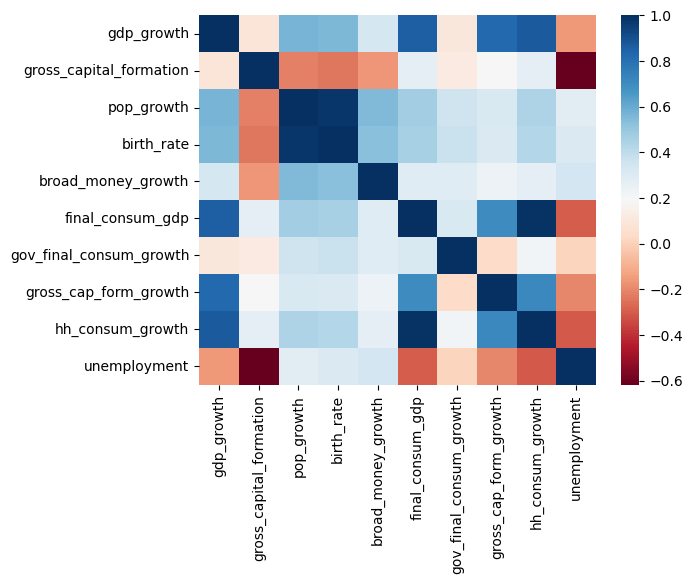

In [130]:
# display it in a heatmap form.
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap= "RdBu")
plt.show()

In [132]:
# Obs: birth_rate & pop_growth are too highly correlated- there's multicollinearity between them.

#### How much is a variable contributing to the std error in the model?

In [135]:
## Use the variance inflation factor (>5) to determine whether greater multicollinearity exists.

# the dataframe before.
econ_df_before = econ_df

# Add the VFI to a constant term in the data.
X1 = sm.tools.add_constant(econ_df_before)

# create a series to calculate VFI.
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)

# display series
print("The data before: ")
print("-"* 50)
display(series_before)


The data before: 
--------------------------------------------------


const                       314.550196
gdp_growth                    9.807879
gross_capital_formation       2.430057
pop_growth                   25.759263
birth_rate                   26.174369
broad_money_growth            1.633079
final_consum_gdp           2305.724577
gov_final_consum_growth      32.527332
gross_cap_form_growth         3.796420
hh_consum_growth           2129.093629
unemployment                  2.800008
dtype: float64

In [137]:
# the data frame after deleting the large VFI factor variables. 
# the dataframe before.
econ_df_after= econ_df.drop(["gdp_growth","pop_growth","birth_rate","final_consum_gdp","gov_final_consum_growth","hh_consum_growth"], axis=1)

# Add the VFI to a constant term in the data.
X2 = sm.tools.add_constant(econ_df_after)

# create a series to calculate VFI.
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

# display series
print("The data after: ")
print("-"* 50)
display(series_after)


The data after: 
--------------------------------------------------


const                      188.510724
gross_capital_formation      1.631584
broad_money_growth           1.268276
gross_cap_form_growth        1.178199
unemployment                 1.874054
dtype: float64

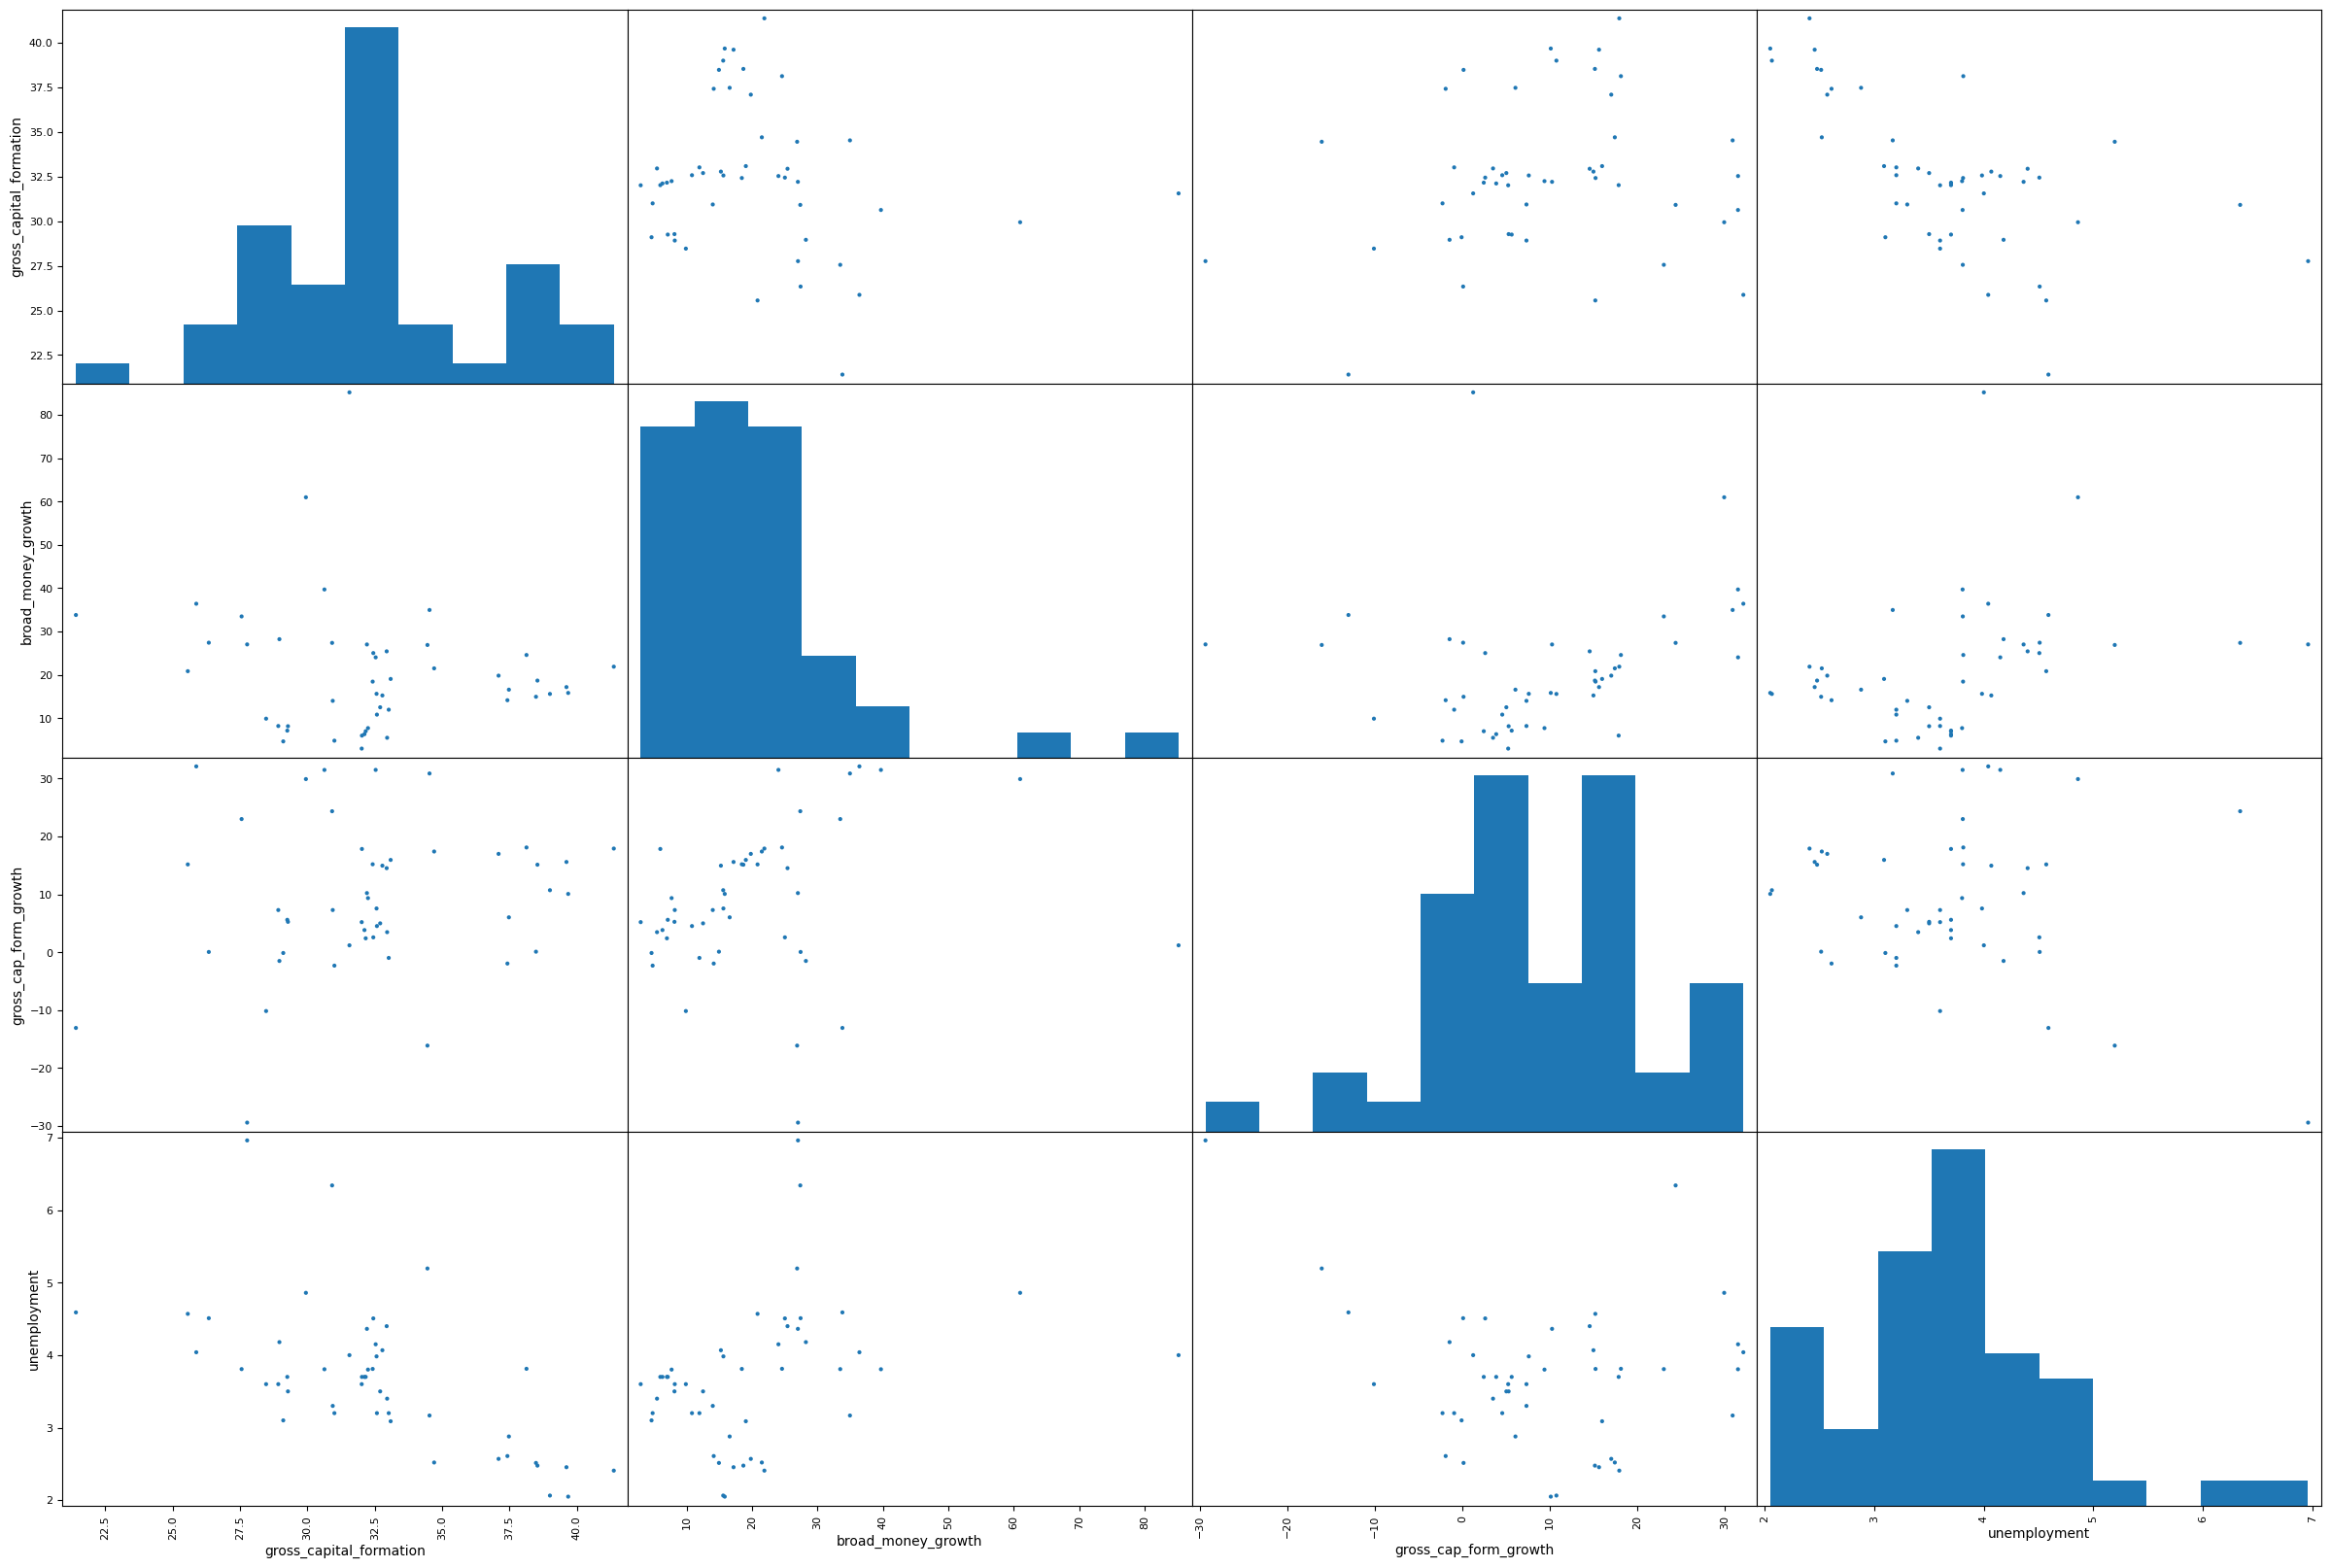

In [139]:
# Identify correlated variables.

#define the plot.
pd.plotting.scatter_matrix(econ_df_after, alpha =1, figsize = (30,20))

plt.show()

### Descriptive Statistics

In [142]:
# create a new df to get the descriptive stats.
desc_df = econ_df_after.describe()

# add the standard deviation metricsn into new rows. 
# plus 3 std devs.
desc_df.loc["+3_std"] = desc_df.loc["mean"] + (desc_df.loc["std"] *3)
# minus std devs.
desc_df.loc["-3_std"] = desc_df.loc["mean"] - (desc_df.loc["std"] *3)

# display the data.
desc_df

gross_capital_formation  broad_money_growth  gross_cap_form_growth  \
count                 48.000000           48.000000              48.000000   
mean                  32.433236           20.426621               8.965681   
std                    4.136932           14.748442              12.629912   
min                   21.404761            2.980690             -29.403255   
25%                   29.776910           10.586461               2.114078   
50%                   32.335229           17.807598               7.431966   
75%                   34.474874           26.923837              16.210283   
max                   41.374062           85.203081              32.098276   
+3_std                44.844034           64.671947              46.855416   
-3_std                20.022439          -23.818705             -28.924054   

        unemployment  
count      48.000000  
mean        3.678096  
std         0.968616  
min         2.048000  
25%         3.150475  
50%         3.700000  
75%         4.088500  
max         6.963000  
+3_std      6.583944  
-3_std      0.772247

In [144]:
# Obs: broad_money_growth has sig. std devs below and above the mean because of the 1998 Asian Financial Crash + 2001 dot com bust.

### Build the Model

In [147]:
# rebuild the df.
econ_df_after= econ_df.drop(["pop_growth","birth_rate","final_consum_gdp","gov_final_consum_growth","hh_consum_growth"], axis=1)

In [149]:
# define the X & Y variables.
X = econ_df_after.drop("gdp_growth", axis = 1)
Y = econ_df_after[["gdp_growth"]]

In [151]:
# Split the X and Y variables into training sets.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.20, random_state=1)

In [153]:
# create a linear regression model.
regression_model = LinearRegression()

In [155]:
# pass through the training set X & Y training data.
regression_model.fit(X_train, y_train)

LinearRegression()

In [157]:
# Produce the coefficents of the model and the intercept.
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

In [159]:
# If all the x-axis variables were at 0, then the intercept for the model is:
print("The y-intercept for the model is: {:.3} ".format(intercept))

The y-intercept for the model is: 5.79 


In [161]:
# What are the coefficients?
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The coefficent for {} is {:.3}". format(coef[0],coef[1]))

The coefficent for gross_capital_formation is -0.0304
The coefficent for broad_money_growth is 0.0356
The coefficent for gross_cap_form_growth is 0.277
The coefficent for unemployment is -0.257


In [163]:
# Get the multiple predictions.
y_predict = regression_model.predict(X_test)

In [165]:
# Show the first 5 predictions.
y_predict[:5]

array([[6.52513794],
       [4.53788318],
       [5.62115071],
       [4.78318954],
       [8.78897423]])

### Evaluating the Model

In [168]:
# define our input by rebuilding the model using statsmodel.
X2 = sm.add_constant(X)

In [170]:
# Create the OLS model- the constant variable.
model = sm.OLS(Y, X2)

In [172]:
# Fit the data.
est = model.fit()

#### Are the residuals homoscedastic? If yes, proceed.

In [175]:
# H0 = homoscedastic but Ha = heteroscedastic (variances aren't equal) @ p-value > 0.05

In [177]:
# Use the White test to check for heteroscedasticity. 
_, pval, __, f_val = diag.het_white(est.resid, est.model.exog)
print(pval, f_val)

0.09435568467590888 0.06759050974000559


In [179]:
# print the results of the White test.
if pval >0.05:
    print("The White Test shows that the p-value was {:.2}".format(pval))
    print("Therefore, we fail to reject the null hypothesis and there is homoscedasticity.  \n")
else:
    print("The White Test shows that the p-value was {:.2}".format(pval))
    print("Therefore, we reject the null hypothesis and there is heteroscedasicity.  \n")

The White Test shows that the p-value was 0.094
Therefore, we fail to reject the null hypothesis and there is homoscedasticity.  



In [181]:
# Use the Breusch-Pagan test to check for heteroscedasticity. 
_, pval, __, f_val = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_val)

0.1528806611957411 0.15820064380354612


In [183]:
# print the results of the Breusch-Pagan test.
if pval >0.05:
    print("The Breusch-Pagan test shows that the p-value was {:.2}".format(pval))
    print("Therefore, we fail to reject the null hypothesis and there is homoscedasticity.  \n")
else:
    print("The Breusch-Pagan test shows that the p-value was {:.2}".format(pval))
    print("Therefore, we reject the null hypothesis and there is heteroscedasicity.  \n")

The Breusch-Pagan test shows that the p-value was 0.15
Therefore, we fail to reject the null hypothesis and there is homoscedasticity.  



#### Is there auto-correlation? If yes, do not proceed.

In [186]:
# import statistical tests.
from statsmodels.stats.stattools import durbin_watson

In [188]:
# calculate the lag.
lag = min(10, (len(X)//5))
print ("The number of lags will be {} ".format(lag))

The number of lags will be 9 


In [190]:
# use the Ljung-Box test for no autocorrelation of the residuals.
test_results = diag.acorr_ljungbox(est.resid, lags= lag)

In [192]:
# What is the p-value?
ibvalue, p_val = test_results
print(test_results)

     lb_stat  lb_pvalue
1   6.965301   0.008311
2  12.579822   0.001855
3  16.976544   0.000715
4  18.737281   0.000885
5  20.464067   0.001022
6  20.501244   0.002254
7  20.772576   0.004122
8  20.774020   0.007773
9  21.372553   0.011095


In [194]:
# What are the results of the Ljung-Box test? 
if min(test_results["lb_pvalue"]) > 0.05:
    print("The lowest p-value that was found: {:.2}".format(min(test_results["lb_pvalue"])))
    print("Therefore, we fail to reject the null hypothesis so there is no autocorrelation. \n")
else:
    print("The lowest p-value was {:.3}".format(min(test_results["lb_pvalue"])))
    print("Therefore, we reject the null hypothesis and there is autocorrelation.  \n")

The lowest p-value was 0.000715
Therefore, we reject the null hypothesis and there is autocorrelation.  



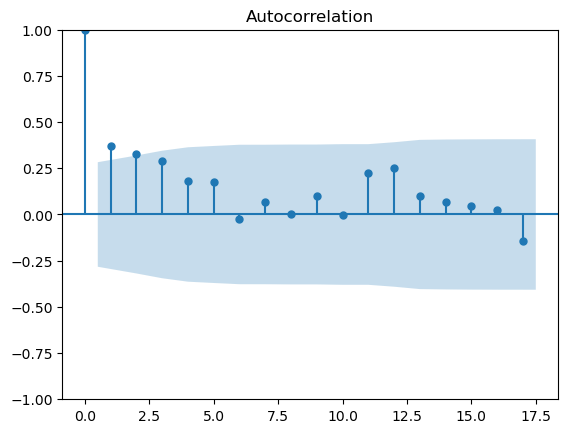

In [196]:
# plot autocorrelation.
sm.graphics.tsa.plot_acf(est.resid)
plt.show()

In [198]:
# Obs: There is autocorrelation so this model isn't very good due to the p-value of 0.00715 < 0.05.
# The model should not proceed but in order to finish the statistics, the checks will continue.

#### Check for Normal Distribution.

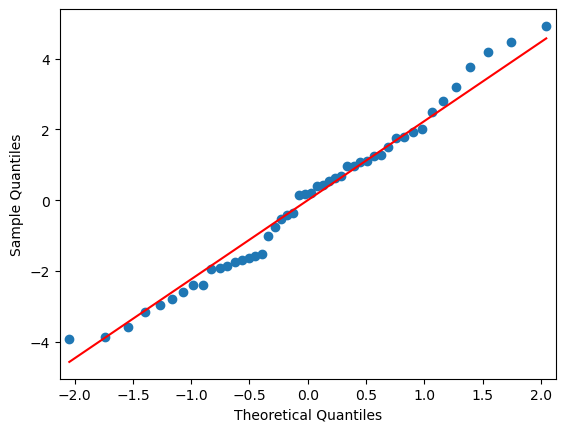

In [204]:
# Use the QQ plot to visualise the normal distribution.
import pylab
sm.qqplot(est.resid, line = "s")
pylab.show()

In [ ]:
# Obs: it looks like it hugs the line

In [208]:
# Check that the mean of the residual is approx. 0.
mean_residuals = sum(est.resid)/len(est.resid)
print("The mean of the residual is {:.4}".format(mean_residuals))

The mean of the residual is -3.414e-15


In [210]:
#Obs: It is close to 0. Somewhat normally distributed.

#### Measures of Errors.

In [213]:
import math
# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_predict)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_predict)

# calulcate the root mean squared error
model_rmse =  math.sqrt(model_mse)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 4.43
MAE 1.47
RMSE 2.1


#### R2 Squared

In [216]:
model_r2 = r2_score(y_test, y_predict)

In [220]:
print("The R-Squared is {:.2}".format(model_r2))

The R-Squared is 0.15


#### What are the Confidence Intervals?

In [223]:
#95% CI level.
est.conf_int()

0          1
const                    0.088548  18.951980
gross_capital_formation -0.324751   0.103946
broad_money_growth      -0.002624   0.103395
gross_cap_form_growth    0.199691   0.319017
unemployment            -1.528637   0.433655

#### Hypothesis Testing

In [226]:
# estimate the p-values.
est.pvalues

const                      4.797965e-02
gross_capital_formation    3.047410e-01
broad_money_growth         6.191672e-02
gross_cap_form_growth      4.004791e-11
unemployment               2.666879e-01
dtype: float64

In [228]:
#print the stats summary.
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:             gdp_growth   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     26.63
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           3.77e-11
Time:                        08:28:52   Log-Likelihood:                -106.68
No. Observations:                  48   AIC:                             223.4
Df Residuals:                      43   BIC:                             232.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Save the Model for Future Use.

In [231]:
import pickle

In [233]:
# pickle the model.
with open("my_multiple_linear.sav", "wb") as f:
    pickle.dump(regression_model, f)

In [235]:
#load it back in.
with open("my_multiple_linear.sav", "rb") as pickle_file:
    regression_model_2= pickle.load(pickle_file)

In [237]:
#make a new prediction.
regression_model_2.predict([X_test.loc[2002]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[6.52513794]])